In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import special

In [2]:
def dimension(aM):
    cov_m = np.cov(aM)
    trC_2 = np.sum(np.diag(cov_m))**2
    tr_C2 = np.sum(cov_m * cov_m)
    dim_m = trC_2 / tr_C2
    return dim_m

def run_network(N, k, M, f, times, inh_flag):
    
    rng = np.random.default_rng(seed=100*k)
    
    aM = np.zeros((M, len(times)))
    X = rng.normal(0, 1, (N, len(times)))
    
    J = np.zeros((M, N))
    for post in range(M):
        pre = rng.choice(N, size=k, replace=False)
        J[post, pre] = 1
    
    if inh_flag:
        J = J - np.mean(J)
    
    #define thresholds for each neuron in M, based on f
    theta = np.sqrt(2*np.sum(J**2, axis=1)) * special.erfcinv(2*f)
    
    for it,t in enumerate(times):      
    
        m0 = np.dot(J, X[:,it]) - theta
        aM[:, it] = np.where(m0 > 0, 1, 0)
        
    return aM

In [3]:
# parameters

N = 50
Ks = np.arange(2, 21) # this is what we will change
f = 0.1
times = np.arange(0, 10000)
S = 14000

In [7]:
dimMs = np.zeros((len(Ks), 2))

for ik, k in enumerate(Ks):
        M = np.round(S/k, 0).astype(int)
        
        t0 = time.time()
        aM = run_network(N, k, M, f, times, inh_flag=False)
        dim_mk = dimension(aM)
        t1 = time.time()
        print(k, t0-t1)
        dimMs[ik, 0] = dim_mk/N
        
        aM_inh = run_network(N, k, M, f, times, inh_flag=True)
        dim_mk = dimension(aM_inh)
        dimMs[ik, 1] = dim_mk/N

print('Maximum dimension at K = {}, No inh'.format(Ks[np.argmax(dimMs[:,0])]))
print('Maximum dimension at K = {}, Inh'.format(Ks[np.argmax(dimMs[:,1])]))

2 -4.846452713012695
3 -1.962264060974121
4 -1.4050376415252686
5 -1.153242588043213
6 -0.9193770885467529
7 -0.7164874076843262
8 -0.5835592746734619
9 -0.5059490203857422
10 -0.4399840831756592
11 -0.43613767623901367
12 -0.36042261123657227
13 -0.3250157833099365
14 -0.29759860038757324
15 -0.28638410568237305
16 -0.2695164680480957
17 -0.25929927825927734
18 -0.2548987865447998
19 -0.26537561416625977
20 -0.26061439514160156
Maximum dimension at K = 3, No inh
Maximum dimension at K = 8, Inh


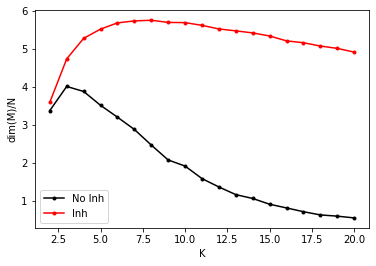

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.plot(Ks, dimMs[:,0], 'k.-', label='No Inh')
ax.plot(Ks, dimMs[:,1], 'r.-', label='Inh')
ax.set_xlabel('K')
ax.set_ylabel('dim(M)/N')
ax.legend()